# Procedimento:

- Importare dati, isolare feature _'sii'_  (target feature)
- Rimuovere le feature presenti solo nel train e non test set
- Rimuovere feature con una percentuale di valori NaN >= 60%
- Splittare feature tra categoriche e numeriche
- Rimuovere record con una percentuale di valori NaN >= [ (considerando le 39 feature numeriche, definisco la percentuale come: numero feature Physical + numero feature FGC + numero feature BIA / 39 ) ] * 100
- Boxplot delle feature (suddivise per tipologia, BIA; Physical; FGC; etc.) per visualizzare gli outliers
- Rimuovo record che presenta grandi outliers (rischio di aumentare MSE del modello)
- [OPZIONALE] Provare a unificare feature simili o aggregabili (Physical_Height con Physical_Weight con Physical_BMI)
- [OPZIONALE] Capire se vale la pena unificare blocco FGC formato da FGC_attributo; FGC_attributo_zona
- Capire come riempire i record NaN (usare media? interpolazione? insiemi di medie?)
- Capito ciò allineare il riempimento con il tipo di dato presente in origine (se dato registrato è intero e riempio con x, se 0<=x < 0.5 floor(x); se 0.5 < x < 1 ceiling(x) )
- 1HE su feature categoriche
- Estraggo dataset

In [71]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np

load_dotenv()
TRAIN_SET = os.getenv("TRAIN_PATH")
TEST_SET  = os.getenv("TEST_PATH")

train = pd.read_csv(TRAIN_SET)
test = pd.read_csv(TEST_SET)


train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Import!**

In [73]:
import importlib
import utils as ut

importlib.reload(ut)

<module 'utils' from 'd:\\UniLectures\\.III\\DWM\\DWM\\utils.py'>

In [74]:
train = train.dropna(subset=['sii']) #removes all the records with NaN in the sii (target) column

y_train = train['sii']

y_train.shape

(2736,)

In [75]:
X_train = ut.intersect_features(train, test) #selects the features that are present in both train and test sets
X_train['sii'] = y_train
X_train.shape

(2736, 59)

In [76]:
X_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0


In [77]:
X_train, removed_features = ut.drop_columns(X_train, 0.4)
X_train.shape

(2736, 49)

In [78]:
X_train_numerical, X_train_categorical = ut.extract_numerical_cathegorical(X_train)

print("There are: ", len(X_train_numerical), "| Numerical Features -> ", X_train_numerical)
print("There are: ", len(X_train_categorical), " | Categorical Features -> ", X_train_categorical)

There are:  40 | Numerical Features ->  ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'sii']
There are:  9  | Categorical Features ->  ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']


In [79]:
#i want to isolate all the important features with missing values: Physical, FGC, BIA
feature_clusters = ['Physical', 'FGC', 'BIA']
print(feature_clusters)

['Physical', 'FGC', 'BIA']


In [80]:
rows_clusters_information = ut.count_feature_clusters(X_train_numerical, feature_clusters) #now i know how many features per important type i have
#i need it for calcuating the percentage of missing values per rows
print(rows_clusters_information)

{'Physical': 6, 'FGC': 10, 'BIA': 16}


In [81]:
total = 0
for key in rows_clusters_information:
    total += rows_clusters_information[key]
print(total)

32


In [82]:
rows_percentage = np.floor(total / len(X_train_numerical) * 100)
print(rows_percentage)

80.0


In [83]:
#now i want to delete all the rows with more of 80% of missing values. Before that i want to reattach the target column to the dataset
X_train_dropped_rows = ut.drop_rows(X_train, 0.25) #i'll stay a bit higher only bcause i want to see the future result. And i'm dropping very few rows
X_train_dropped_rows.shape

(2641, 49)

In [84]:
X_train_dropped_rows.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,75.0,...,15.4107,27.0552,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,65.0,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,60.0,...,26.4798,45.9966,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,60.0,...,35.3804,63.1265,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0


Now i start with the **boxplot** of the features by cathegory

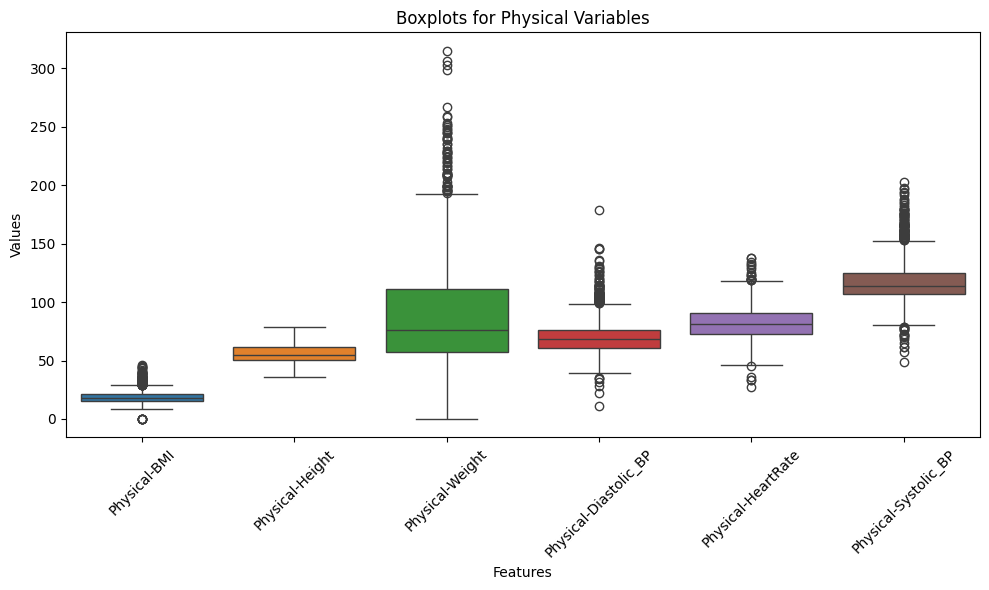

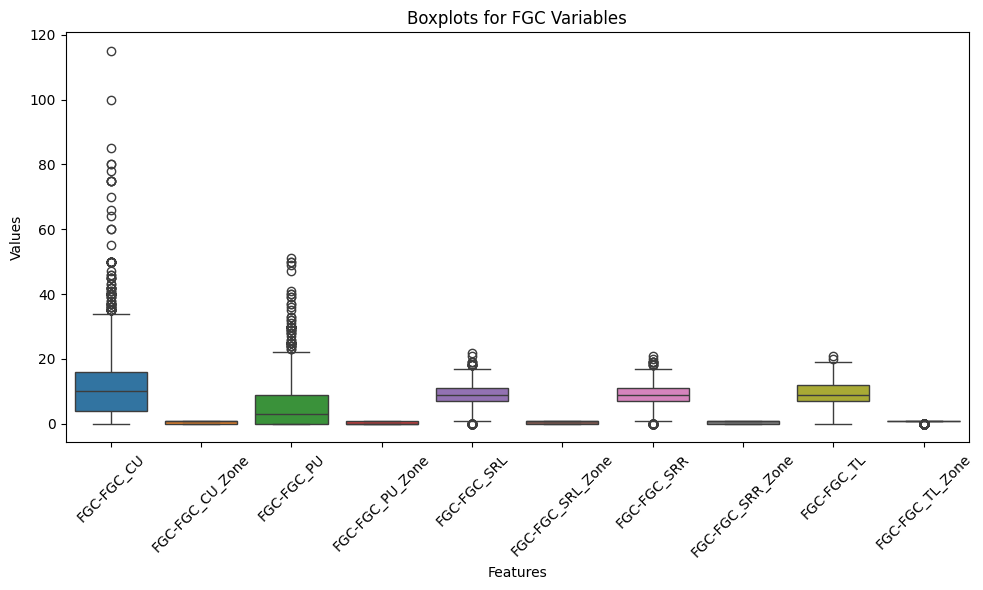

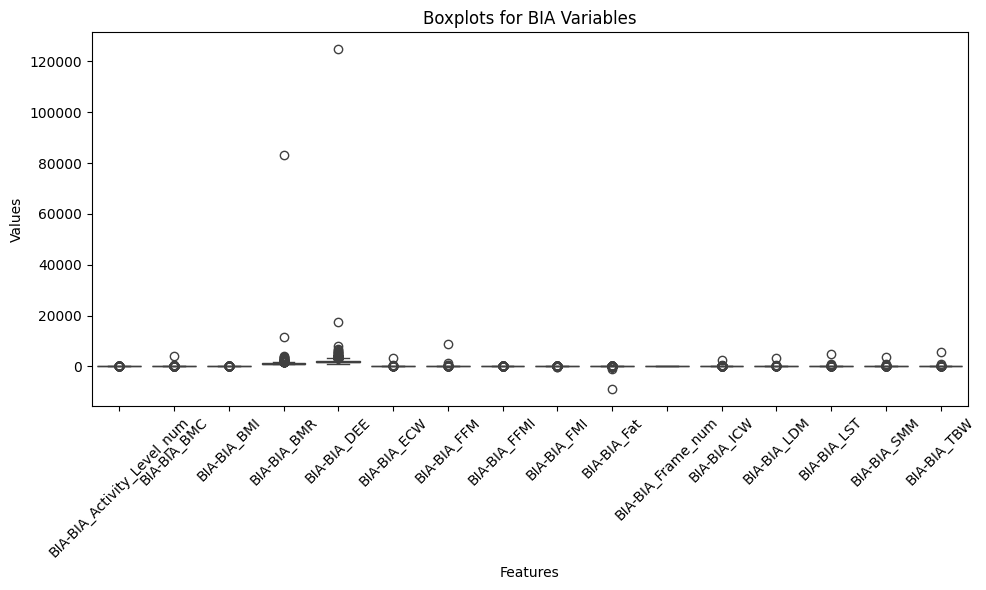

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

group_of_interest = {
        'Physical': [col for col in X_train_dropped_rows.columns if col.startswith('Physical-')],
        'FGC'     : [col for col in X_train_dropped_rows.columns if col.startswith('FGC-')],
        'BIA'     : [col for col in X_train_dropped_rows.columns if col.startswith('BIA-')],
    }
for group_name, columns in group_of_interest.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_train_dropped_rows[columns])
    plt.title(f'Boxplots for {group_name} Variables')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()   

I have very strangely high values and I want to remove them

In [86]:
#i want to remove the outliers from the dataset. I use a relaxed approach (* 3.0) instead of the classical one 
# this because with the classical (* 1.5) i remain with 385 features  
X_train_no_outliers_iqr = ut.remove_outliers_iqr(X_train_dropped_rows, ['sii'] + (X_train_categorical))
X_train_no_outliers_iqr.shape

(520, 49)

I actually drop a lot of records but Im gonna keep this as a try

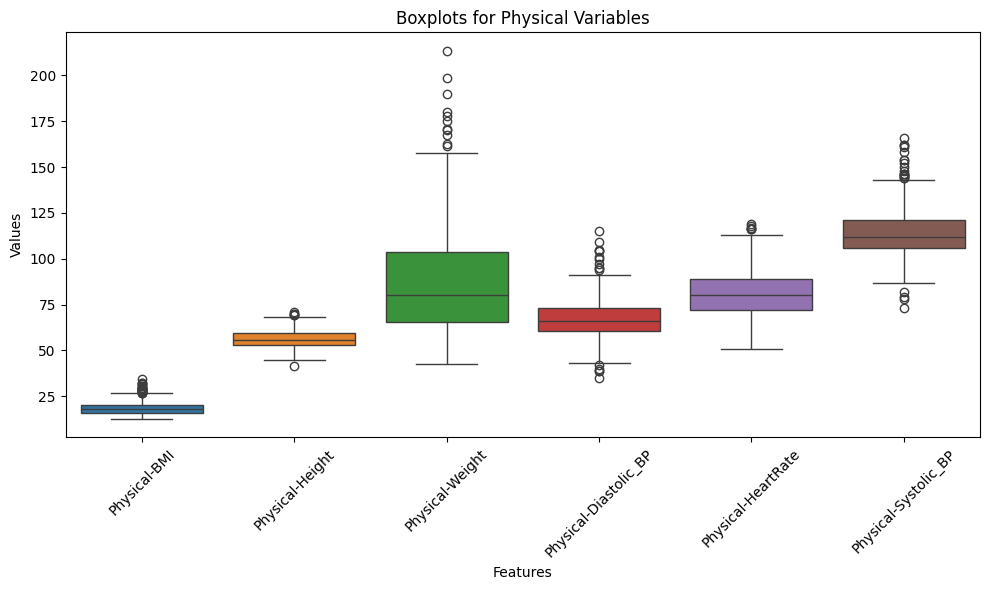

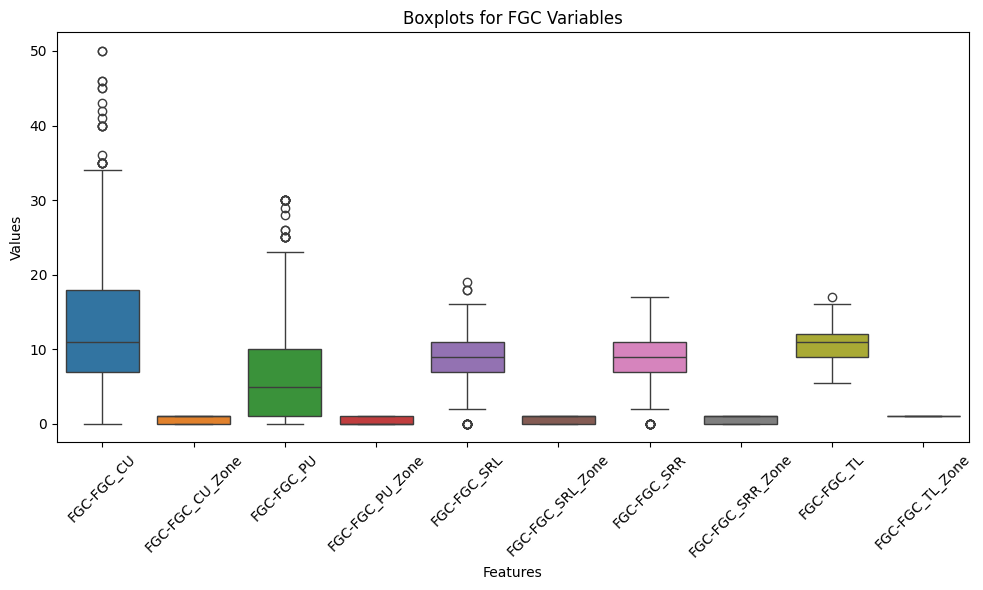

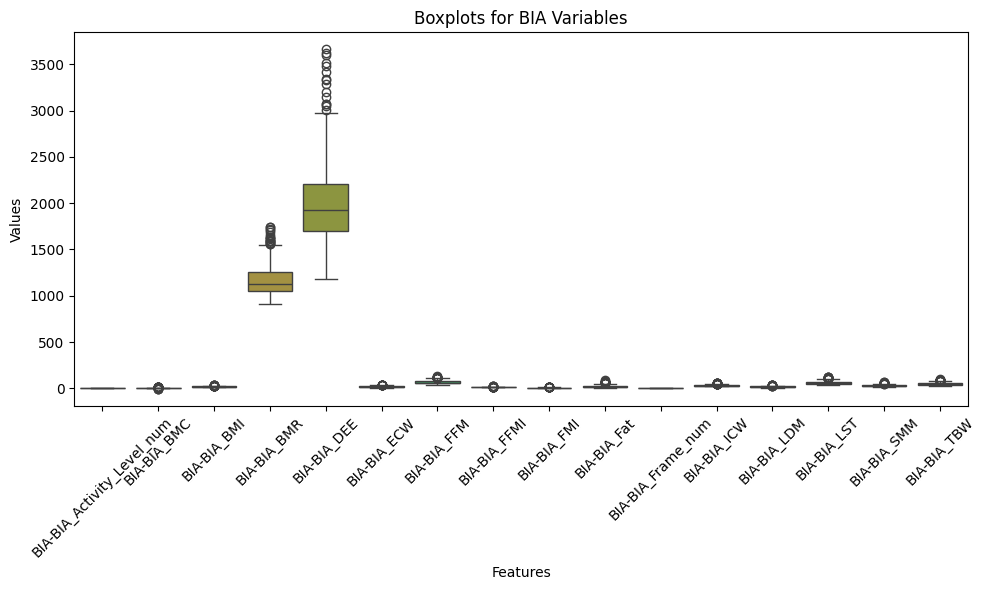

In [87]:
for group_name, columns in group_of_interest.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_train_no_outliers_iqr[columns])
    plt.title(f'Boxplots for {group_name} Variables')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()   

A lot of records got deleted but boxplot seems a little better... Let's continue and try anyway to follow up the steps described at the beginning of the notebook

In [88]:
X_train = X_train_no_outliers_iqr
y_train = X_train['sii']
X_train = X_train.drop(columns=['sii'])
X_train.info()
print("=====================================")
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 3 to 3957
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               520 non-null    object 
 1   Basic_Demos-Age                         520 non-null    int64  
 2   Basic_Demos-Sex                         520 non-null    int64  
 3   CGAS-Season                             520 non-null    object 
 4   CGAS-CGAS_Score                         520 non-null    float64
 5   Physical-Season                         520 non-null    object 
 6   Physical-BMI                            520 non-null    float64
 7   Physical-Height                         520 non-null    float64
 8   Physical-Weight                         520 non-null    float64
 9   Physical-Diastolic_BP                   520 non-null    float64
 10  Physical-HeartRate                      520 non-null    float64
 1

(520, 48)

In [89]:
y_train.info()
print("=====================================")
y_train.shape

<class 'pandas.core.series.Series'>
Index: 520 entries, 3 to 3957
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
520 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


(520,)

In [90]:
#I want to 1HE the categorical features
X_train_decoded = pd.get_dummies(X_train, columns=X_train_categorical)
X_train_decoded *= 1
X_train_decoded.shape

(520, 75)

In [91]:
X_train = ut.fill_missing_values(X_train_decoded)
X_train.head()  

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
3,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,0,1,0,0,1,0,0,0,0,1
20,14,0,68.0,17.168636,66.5,108.0,60.0,71.0,129.0,16.0,...,0,1,0,1,0,0,0,0,0,1
22,12,0,58.0,34.187282,60.5,178.0,67.0,81.0,119.0,8.0,...,0,0,1,0,0,0,1,0,0,0
51,12,1,77.0,19.751301,62.0,108.0,55.0,60.0,98.0,30.0,...,0,0,0,0,1,0,0,1,0,0
53,12,1,85.0,15.016020,53.0,60.0,64.0,74.0,117.0,28.0,...,0,0,0,1,0,0,0,0,0,1


In [92]:
X_train.info()
print("=====================================")
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 3 to 3957
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         520 non-null    int64  
 1   Basic_Demos-Sex                         520 non-null    int64  
 2   CGAS-CGAS_Score                         520 non-null    float64
 3   Physical-BMI                            520 non-null    float64
 4   Physical-Height                         520 non-null    float64
 5   Physical-Weight                         520 non-null    float64
 6   Physical-Diastolic_BP                   520 non-null    float64
 7   Physical-HeartRate                      520 non-null    float64
 8   Physical-Systolic_BP                    520 non-null    float64
 9   FGC-FGC_CU                              520 non-null    float64
 10  FGC-FGC_CU_Zone                         520 non-null    float64
 1

(520, 75)

In [93]:
#I want to set all the features to the same type(float64)
X_train = X_train.astype('float64')
X_train.info()
print("=====================================")
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 3 to 3957
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         520 non-null    float64
 1   Basic_Demos-Sex                         520 non-null    float64
 2   CGAS-CGAS_Score                         520 non-null    float64
 3   Physical-BMI                            520 non-null    float64
 4   Physical-Height                         520 non-null    float64
 5   Physical-Weight                         520 non-null    float64
 6   Physical-Diastolic_BP                   520 non-null    float64
 7   Physical-HeartRate                      520 non-null    float64
 8   Physical-Systolic_BP                    520 non-null    float64
 9   FGC-FGC_CU                              520 non-null    float64
 10  FGC-FGC_CU_Zone                         520 non-null    float64
 1

(520, 75)

In [95]:
y_train.info()
print("=====================================")
y_train.shape

<class 'pandas.core.series.Series'>
Index: 520 entries, 3 to 3957
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
520 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


(520,)

In [96]:
#I want to export the cleaned dataset
v4_cleaned_dataset = pd.concat([X_train, y_train], axis=1)  
output_path = os.path.join('dataset/', 'v4_cleaned_dataset.csv')
v4_cleaned_dataset.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to dataset/v4_cleaned_dataset.csv
